## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
data = pd.read_csv("crab_age.csv", index_col = "id")
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


## Data pre-processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sex             200000 non-null  object 
 1   Length          200000 non-null  float64
 2   Diameter        200000 non-null  float64
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Shucked Weight  200000 non-null  float64
 6   Viscera Weight  200000 non-null  float64
 7   Shell Weight    200000 non-null  float64
 8   Age             200000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 15.3+ MB


In [5]:
data["Sex"].unique()

array(['M', 'I', 'F', '0.025'], dtype=object)

In [6]:
data["Sex"].value_counts()

M        72270
I        66632
F        61097
0.025        1
Name: Sex, dtype: int64

In [7]:
data = data[data["Sex"] != "0.025"]

In [8]:
data["Sex"] = data["Sex"].astype('category')
data.iloc[:, 1:] = data.iloc[:, 1:].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Sex             199999 non-null  category
 1   Length          199999 non-null  float32 
 2   Diameter        199999 non-null  float32 
 3   Height          199999 non-null  float32 
 4   Weight          199999 non-null  float32 
 5   Shucked Weight  199999 non-null  float32 
 6   Viscera Weight  199999 non-null  float32 
 7   Shell Weight    199999 non-null  float32 
 8   Age             199999 non-null  float32 
dtypes: category(1), float32(8)
memory usage: 7.8 MB


## EDA

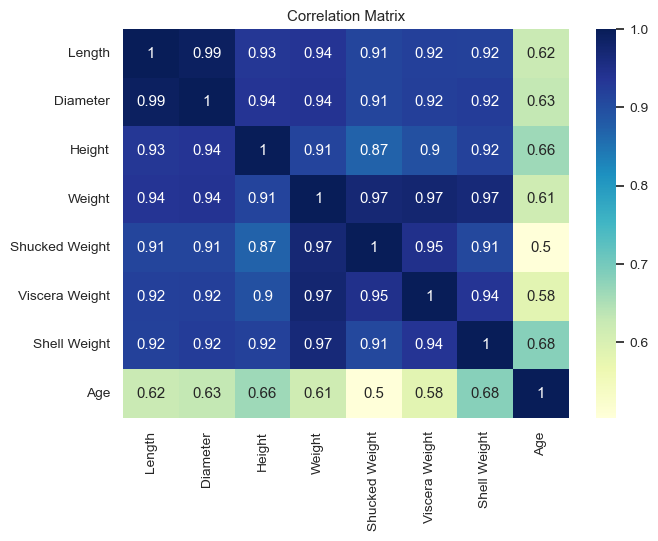

In [9]:
plt.style.use("fivethirtyeight")
sns.set(font_scale = 0.9)
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

#### `Most of the features are highly correlated with each other !`

#### Weight vs Sex Barplot

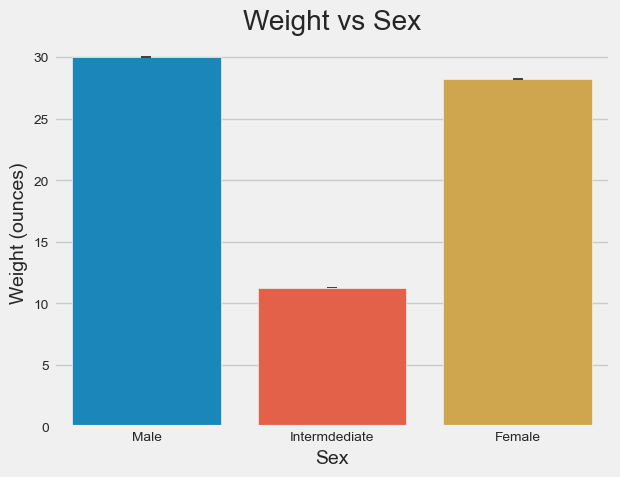

In [10]:
plt.style.use("fivethirtyeight")
sns.barplot(x = "Sex", y = "Weight", data = data)
plt.xticks(ticks = (0, 1, 2), labels = ("Male", "Intermdediate", "Female"))
plt.ylabel("Weight (ounces)")
plt.title("Weight vs Sex")
plt.show()

`Usulally Male crabs are more weighted`

#### Height vs Sex Barplot

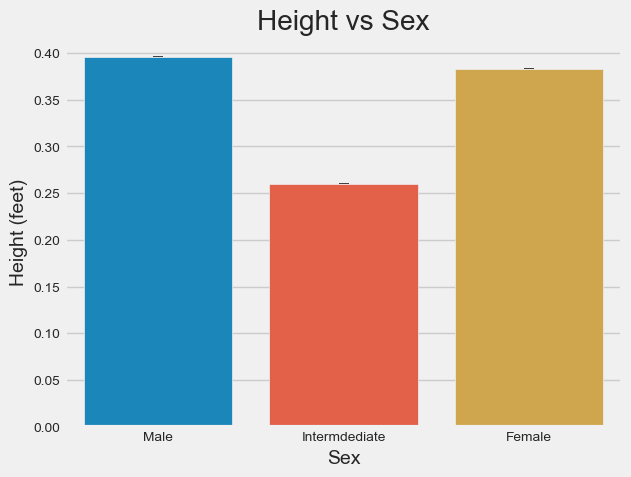

In [11]:
plt.style.use("fivethirtyeight")
sns.barplot(x = "Sex", y = "Height", data = data)
plt.xticks(ticks = (0, 1, 2), labels = ("Male", "Intermdediate", "Female"))
plt.ylabel("Height (feet)")
plt.title("Height vs Sex")
plt.show()

`Usulally Male crabs have more height`

#### Shell weight vs Age

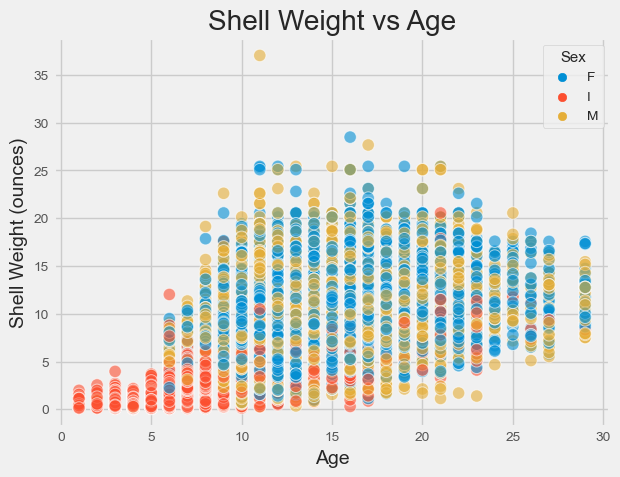

In [79]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x = "Age", y = "Shell Weight", data = data, hue = "Sex", alpha = 0.6, s = 80)
plt.ylabel("Shell Weight (ounces)")
plt.title("Shell Weight vs Age")
plt.show()

`Intermediate crabs are having lesser shell weights and shorter life span`

#### Height vs Age

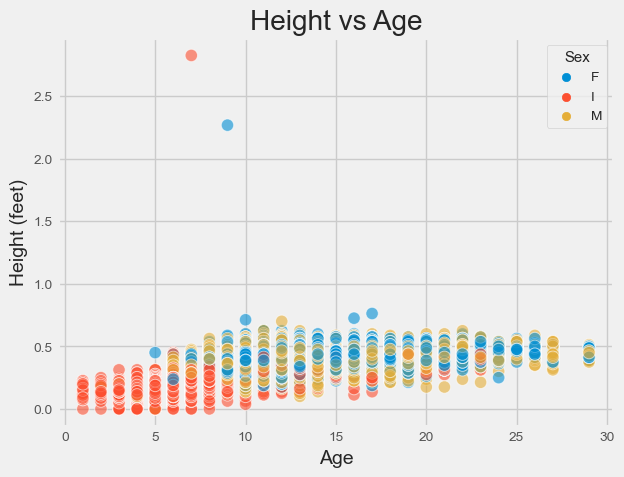

In [80]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x = "Age", y = "Height", data = data, hue = "Sex", alpha = 0.6, s = 80)
plt.ylabel("Height (feet)")
plt.title("Height vs Age")
plt.show()

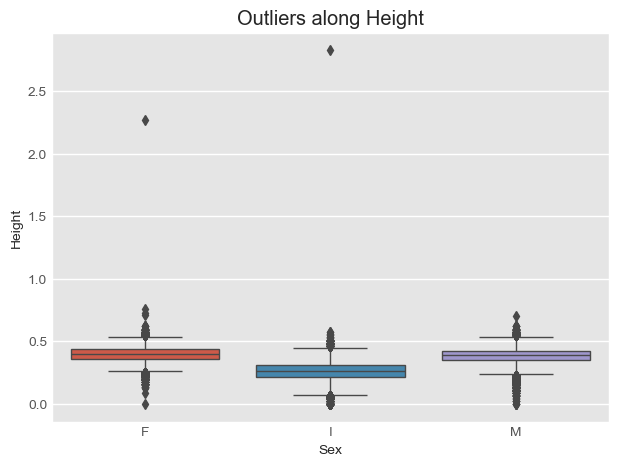

In [14]:
plt.style.use('ggplot')
sns.boxplot(x = "Sex", y = "Height", data = data, linewidth = 1)
plt.title("Outliers along Height")
plt.show()

#### Length vs Age

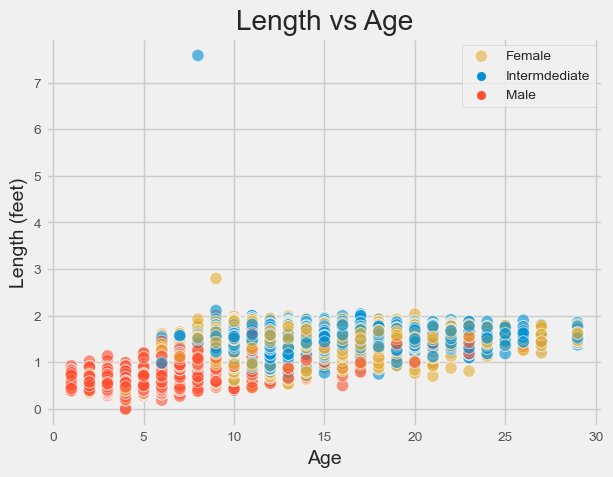

In [15]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x = "Age", y = "Length", data = data, hue = "Sex", alpha = 0.6, s = 80)
plt.ylabel("Length (feet)")
plt.legend(labels = ("Female", "Intermdediate", "Male"))
plt.title("Length vs Age")
plt.show()

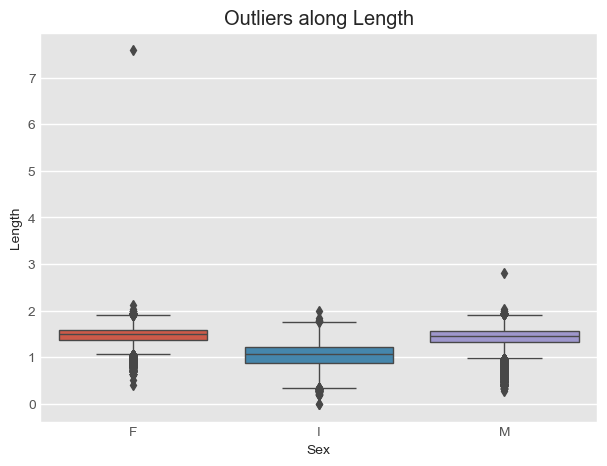

In [16]:
plt.style.use('ggplot')
sns.boxplot(x = "Sex", y = "Length", data = data, linewidth = 1)
plt.title("Outliers along Length")
plt.show()

## Feature and Label Extraction

In [17]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

## Train and Test set split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

## One Hot Encoding

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop = 'first'), [0])], remainder = 'passthrough')
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

##### Removing Outliers

In [21]:
X_train = np.where(X_train > 3.2, 3.2, X_train)
X_train = np.where(X_train < -3.2, -3.2, X_train)

In [22]:
X_test = np.where(X_test > 3.2, 3.2, X_test)
X_test = np.where(X_test < -3.2, -3.2, X_test)

## Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [59]:
Y_pred = lin_reg.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
print(f"R2 score :{r2_score(Y_test, Y_pred) : .3f}")

R2 score : 0.594


## XGBoost Regression

In [70]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective = 'reg:squarederror', n_jobs = -1)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
Y_pred = xgb.predict(X_test)

In [72]:
print(f"R2 score :{r2_score(Y_test, Y_pred) : .3f}")

R2 score : 0.627


## CatBoost Regression

In [73]:
from catboost import CatBoostRegressor
cgb = CatBoostRegressor(verbose = 0)
cgb.fit(X_train, Y_train)

In [65]:
Y_pred = cgb.predict(X_test)

In [66]:
print(f"R2 score :{r2_score(Y_test, Y_pred) : .3f}")

R2 score : 0.634


### I select the `CatBoost Regression` model as it is outperforming other models

`R2 score : 0.634`